<a href="https://colab.research.google.com/github/helderaanunes/ecommerce/blob/main/C%C3%B3pia_de_Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

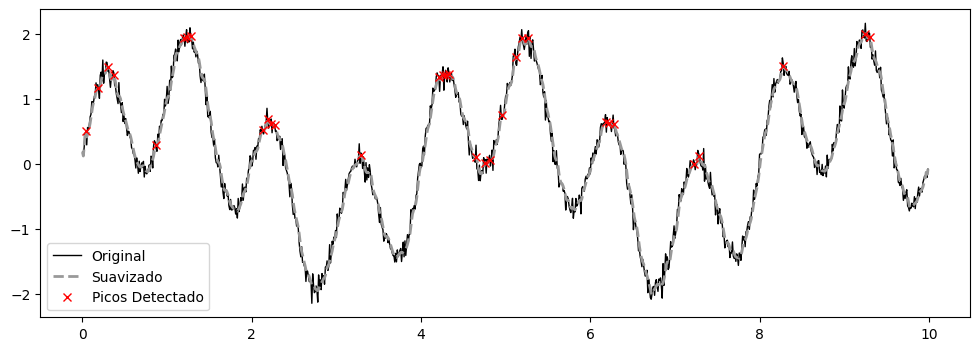

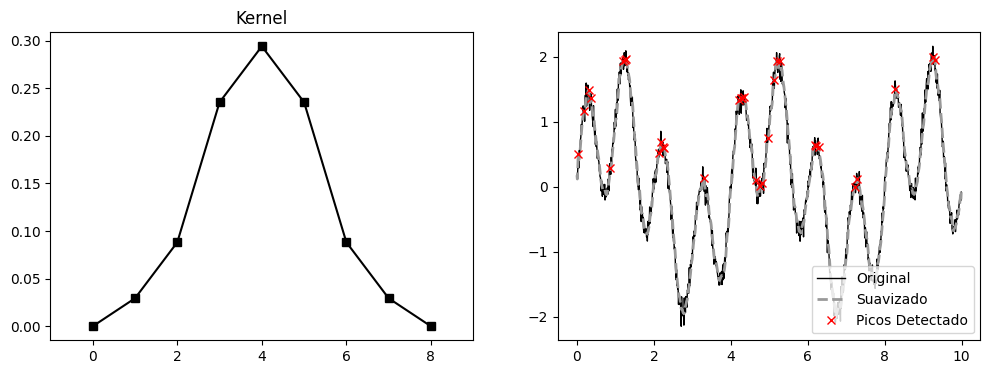

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

#gerar uma serie temporal de exemplo que se assemelha a um ECG
np.random.seed(0)
time = np.arange(0, 10, 0.01)

#simulação de um sinal ECG básico
ecg_signal = np.sin(2*np.pi*1*time) +np.sin(2 * np.pi * 0.25 * time) + np.random.normal(scale=0.1, size=time.shape)

#definir o kernel Gaussiano
kernel = np.array([0, .1, .3, .8, 1, .8, .3, .1, 0])
kernel = kernel / np.sum(kernel) #normalizar o kernel

#parâmetros de comprimento

Nkernel = len(kernel)
halfKrn = Nkernel // 2
Nsignal = len(ecg_signal)

#aplicar o filtro convolucional à série temporal ECG
filtsig = ecg_signal.copy()
for t in range(halfKrn + 1, Nsignal - halfKrn):
  filtsig[t] = np.dot(kernel, ecg_signal[t-halfKrn-1:t + halfKrn])

#detecção de picos na série temporal filtrada
peaks, _ = find_peaks(filtsig, height=0)

#plotar a série temporal original, filtrada e os picos detectados sem kernel
_, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(time, ecg_signal, color='k', label='Original', linewidth=1)
ax.plot(time, filtsig, '--', color=[.6, .6, .6], label='Suavizado', linewidth=2)
ax.plot(time[peaks], filtsig[peaks], 'rx', label='Picos Detectado')
ax.legend()
plt.savefig('Suavização.png', dpi=300)
plt.show()

#PLotar kernel, a série temporal original, filtrada e os picos detectados
_, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(kernel, 'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1, Nkernel])
axs[1].plot(time, ecg_signal, color='k', label='Original', linewidth=1)
axs[1].plot(time, filtsig, '--', color=[.6, .6, .6], label='Suavizado', linewidth=2)
axs[1].plot(time[peaks], filtsig[peaks], 'rx', label='Picos Detectado')
axs[1].legend()
plt.savefig('Filtragem com kernel.png', dpi=300)
plt.show()


In [ ]:
import numpy as np

# Função responsável por retornar o equivalente numérico para as letras do alfabeto
def equivalenteDecimal(letra):
    alfabeto = "abcdefghijklmnopqrstuvwxyz"
    return(alfabeto.find(letra))

# Função responsável por retornar o equivalente alfabético para um valor numérico
def equivalenteAlfabetico(numero):
    alfabeto = "abcdefghijklmnopqrstuvwxyz"
    return(alfabeto[numero])

# Função responsável por codificar/descodificar o texto
def cifraHill(texto, chave, criptografar=True):
    codigo = ""
    valorNumerico = np.empty([2, 1], dtype=int)
    valorCodificado = np.empty([2, 1], dtype=int)

    for indice in range(0, len(texto)):
        if indice == 0 or indice % 2 == 0:
            valor = equivalenteDecimal(texto[indice])
            valorNumerico[0][0] = valor

        if indice != 0 and indice % 2 != 0:
            valor = equivalenteDecimal(texto[indice])
            valorNumerico[1][0] = valor

            valorCodificado = np.dot(chave, valorNumerico)

            if valorCodificado[0][0] > 25:
                valorCodificado[0][0] = valorCodificado[0][0] % 26

            if valorCodificado[1][0] > 25:
                valorCodificado[1][0] = valorCodificado[1][0] % 26

            a = str(equivalenteAlfabetico(valorCodificado[0][0]))
            b = str(equivalenteAlfabetico(valorCodificado[1][0]))
            codigo += a + b

    codigo = codigo[len(codigo) - len(texto):len(codigo)]
    return codigo

# Função responsável por pegar o texto a ser encriptado/descodificado
def inserirFrase():
    texto = str(input("Informe um texto sem acentos: "))
    texto = texto.replace(" ", "")
    texto = texto.lower()

    if len(texto) % 2 != 0:
        texto += "e"
    return texto

# Criação da matriz A para criptografia
A = np.array([[5, 6], [2, 3]])

# Cálculo do resíduo e da matriz de descriptografia
residuo = (A[0][0] * A[1][1] - A[0][1] * A[1][0]) % 26
reciproco = 9
descriptografia = np.array([[A[1][1], -A[0][1]], [-A[1][0], A[0][0]]])
descriptografia *= reciproco
descriptografia %= 26

# Loop para inserir novas frases ou encerrar o programa
while True:
    frase = inserirFrase()
    escolha = input("Você deseja criptografar ou descriptografar? (c/d): ")

    if escolha.lower() == 'c':
        resultado = cifraHill(frase, A, criptografar=True)
        print(f"Texto criptografado: {resultado}")
    elif escolha.lower() == 'd':
        resultado = cifraHill(frase, descriptografia, criptografar=False)
        print(f"Texto descriptografado: {resultado}")
    else:
        print("Escolha inválida. Por favor, escolha 'c' para criptografar ou 'd' para descriptografar.")

    continuar = input("Você deseja inserir uma nova frase? (s/n): ")
    if continuar.lower() != 's':
        print("Programa encerrado.")
        break

Informe um texto sem acentos: abcd
Você deseja criptografar ou descriptografar? (c/d): c
Texto criptografado: gdcn
Você deseja inserir uma nova frase? (s/n): n
Programa encerrado.
